<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/ObjectDetection/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Convolutional Neural Networks`

[Link to download the Dataset](https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv)

**Date Created** :June 12,2021

**AUTHOR**: Sai Vamshi Katkuri
[Github Repository](https://github.com/SaiVamshiKatkuri/ObjectDetection)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

*Multiclass classification* using `CNN` 

**Description**: The dataset contains `60000` images of ten different objects.Each object contains around `6000` images for itself. The goal is to predict the object based on the image given.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING THE NECESSARY LIBRARIES 🙂

In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
import keras 

LOADING AND SPLITTING THE DATA 

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print('Training Images: {}'.format(X_train.shape))     #Finding the shape of train and test sets
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)            # Dimensions of the image

(32, 32, 3)


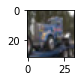

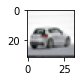

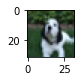

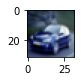

In [7]:
# Lets display some images using Matplotlib
for i in range(322,326):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 😉

In [8]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10

# One hot coding creates new columns for each category
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


##BUILDING THE MODEL 
### Working

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/334639839/figure/fig4/AS:799323273048073@1567584927323/Convolution-Neural-Network-CNN-working-paradigm-with-input-convolution-pooling-layers.ppm"  >

#### Kernel
<img src="https://miro.medium.com/max/1010/1*jIv2CLxdXsxvx60Urc11Tw.png" >

#### Max Pooling
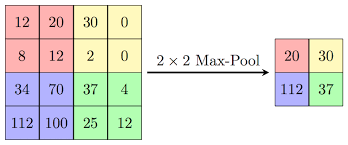

#### Categorical cross entropy 
This is actually a combination of cross entropy loss and softmax loss
<img src="https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png" >


In [9]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 52s 23ms/step - loss: 1.8644 - accuracy: 0.3016 - val_loss: 1.1794 - val_accuracy: 0.5780
Epoch 2/20
391/391 [==============================] - 8s 21ms/step - loss: 1.1555 - accuracy: 0.5905 - val_loss: 0.9210 - val_accuracy: 0.6810
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.9395 - accuracy: 0.6720 - val_loss: 0.8058 - val_accuracy: 0.7222
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.8130 - accuracy: 0.7173 - val_loss: 0.7668 - val_accuracy: 0.7347
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.7215 - accuracy: 0.7468 - val_loss: 0.6922 - val_accuracy: 0.7568
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6413 - accuracy: 0.7762 - val_loss: 0.6784 - val_accuracy: 0.7649
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.5915 - accuracy: 0.7929 - val_loss: 0.6737 - val_accuracy: 0.776

In [16]:
cd '/content/drive/MyDrive/ObjectDetection'

/content/drive/MyDrive/ObjectDetection


### Let's Save the Model

In [17]:
from keras.models import load_model
modelName = f'ObjectDetectionModel.h5'
model.save(f'{os.getcwd()}/{modelName}')


PREDICTING 🤔

In [11]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 447ms/step


In [12]:
print (predictions)

[[1.32936350e-06 1.45128340e-07 1.36593217e-03 6.89646986e-04
  6.38614774e-01 2.32908092e-02 5.91894677e-05 3.35972220e-01
  8.53253880e-07 5.10877817e-06]
 [6.23477308e-06 2.90454796e-06 3.72287375e-03 2.51046866e-01
  4.17375751e-02 6.47250473e-01 4.83992789e-03 5.13149984e-02
  1.16544561e-05 6.64674080e-05]
 [1.02859077e-09 6.14776541e-09 7.51788320e-04 3.59309779e-05
  9.75509920e-07 2.25527343e-04 9.98985589e-01 1.28556692e-07
  2.75599419e-08 2.77236438e-08]
 [3.43153339e-10 1.53715485e-10 6.20563227e-08 9.99148726e-01
  6.48706977e-04 5.16003747e-05 1.50795444e-04 9.18153020e-09
  4.77433915e-09 4.86514384e-09]
 [7.17954952e-15 9.99987960e-01 1.63807681e-21 9.95020625e-19
  1.16469837e-21 1.95289169e-22 1.00482747e-18 2.39094698e-20
  1.03186744e-10 1.20913801e-05]
 [2.83437119e-12 1.00000000e+00 5.30302149e-17 2.16720867e-14
  1.68436948e-18 2.89633983e-19 5.17238022e-16 4.05796766e-19
  3.20570326e-09 2.27609509e-09]
 [1.51454331e-03 5.18900515e-06 4.71699657e-03 3.01941037e

In [13]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
0.99999994
0.9999999
1.0
1.0
0.99999994
1.0
1.0


In [14]:
 #Argmax is an operation that finds the argument that gives the maximum value from a target function
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

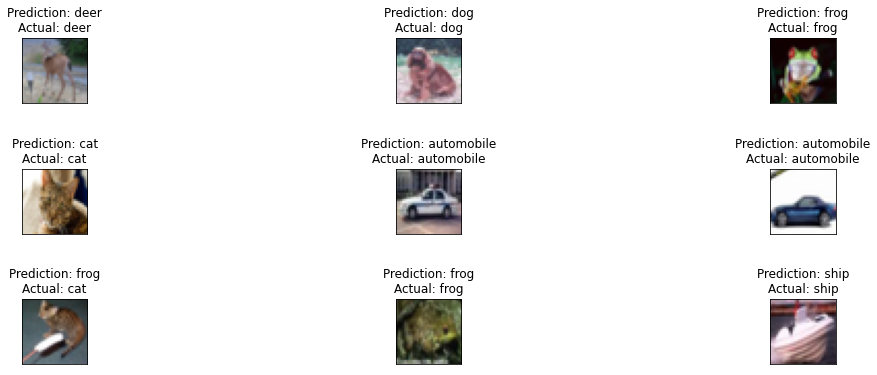

In [15]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()